In [1]:
import pandas as pd 

In [21]:
software_technique_table = pd.read_excel("./enterprise-attack-v9.0-software.xlsx", "techniques_used")
software_technique_table.drop(columns=["source type", "mapping type", "mapping description", "target type"])

,source ID,source name,target ID,target name
0,S0066,3PARA RAT,T1083,File and Directory Discovery
1,S0066,3PARA RAT,T1573.001,Symmetric Cryptography
2,S0066,3PARA RAT,T1070.006,Timestomp
3,S0066,3PARA RAT,T1071.001,Web Protocols
4,S0065,4H RAT,T1083,File and Directory Discovery
...,...,...,...,...
5709,S0350,zwShell,T1082,System Information Discovery
5710,S0350,zwShell,T1016,System Network Configuration Discovery
5711,S0350,zwShell,T1033,System Owner/User Discovery
5712,S0350,zwShell,T1059.003,Windows Command Shell


In [9]:
# want to plot
# - target ID (=technique ID) by appearance
# - Verteilung der Target IDs plotten
# - Anzahl Techniques pro Software plotten
# Anzahl verschiedener Techniques

# later
# Anzahl tactics pro Technique (Verteilung)
# Welche Tacics haben wieviele verschiedene Techniques
# Anzahl Software/ Techniques über die Jahre

<AxesSubplot:>

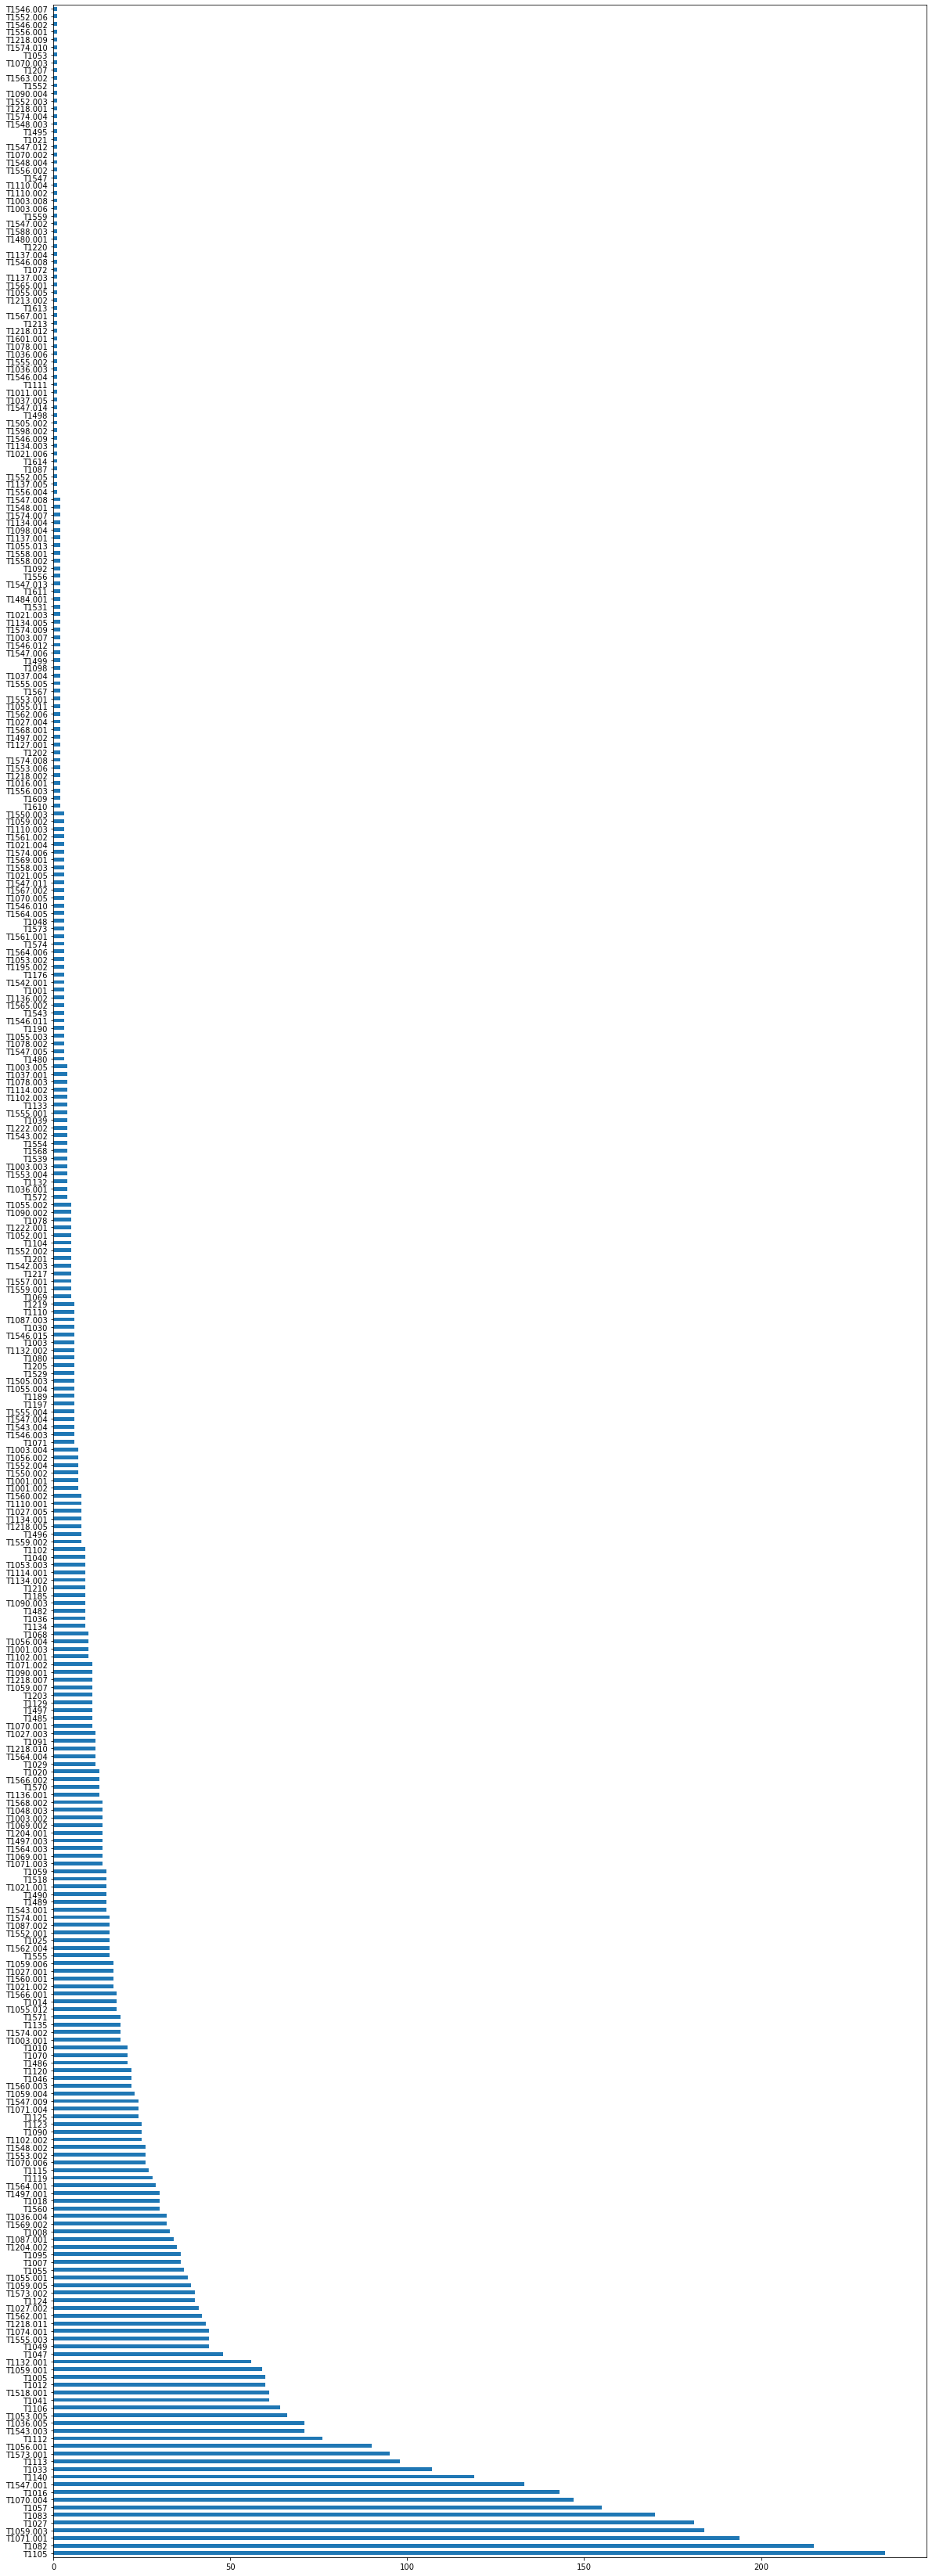

In [54]:
number_of_techniques = software_technique_table["target ID"].value_counts()
software_technique_table["target ID"].value_counts()[:333].plot(kind='barh', figsize=(20, 60))

<AxesSubplot:>

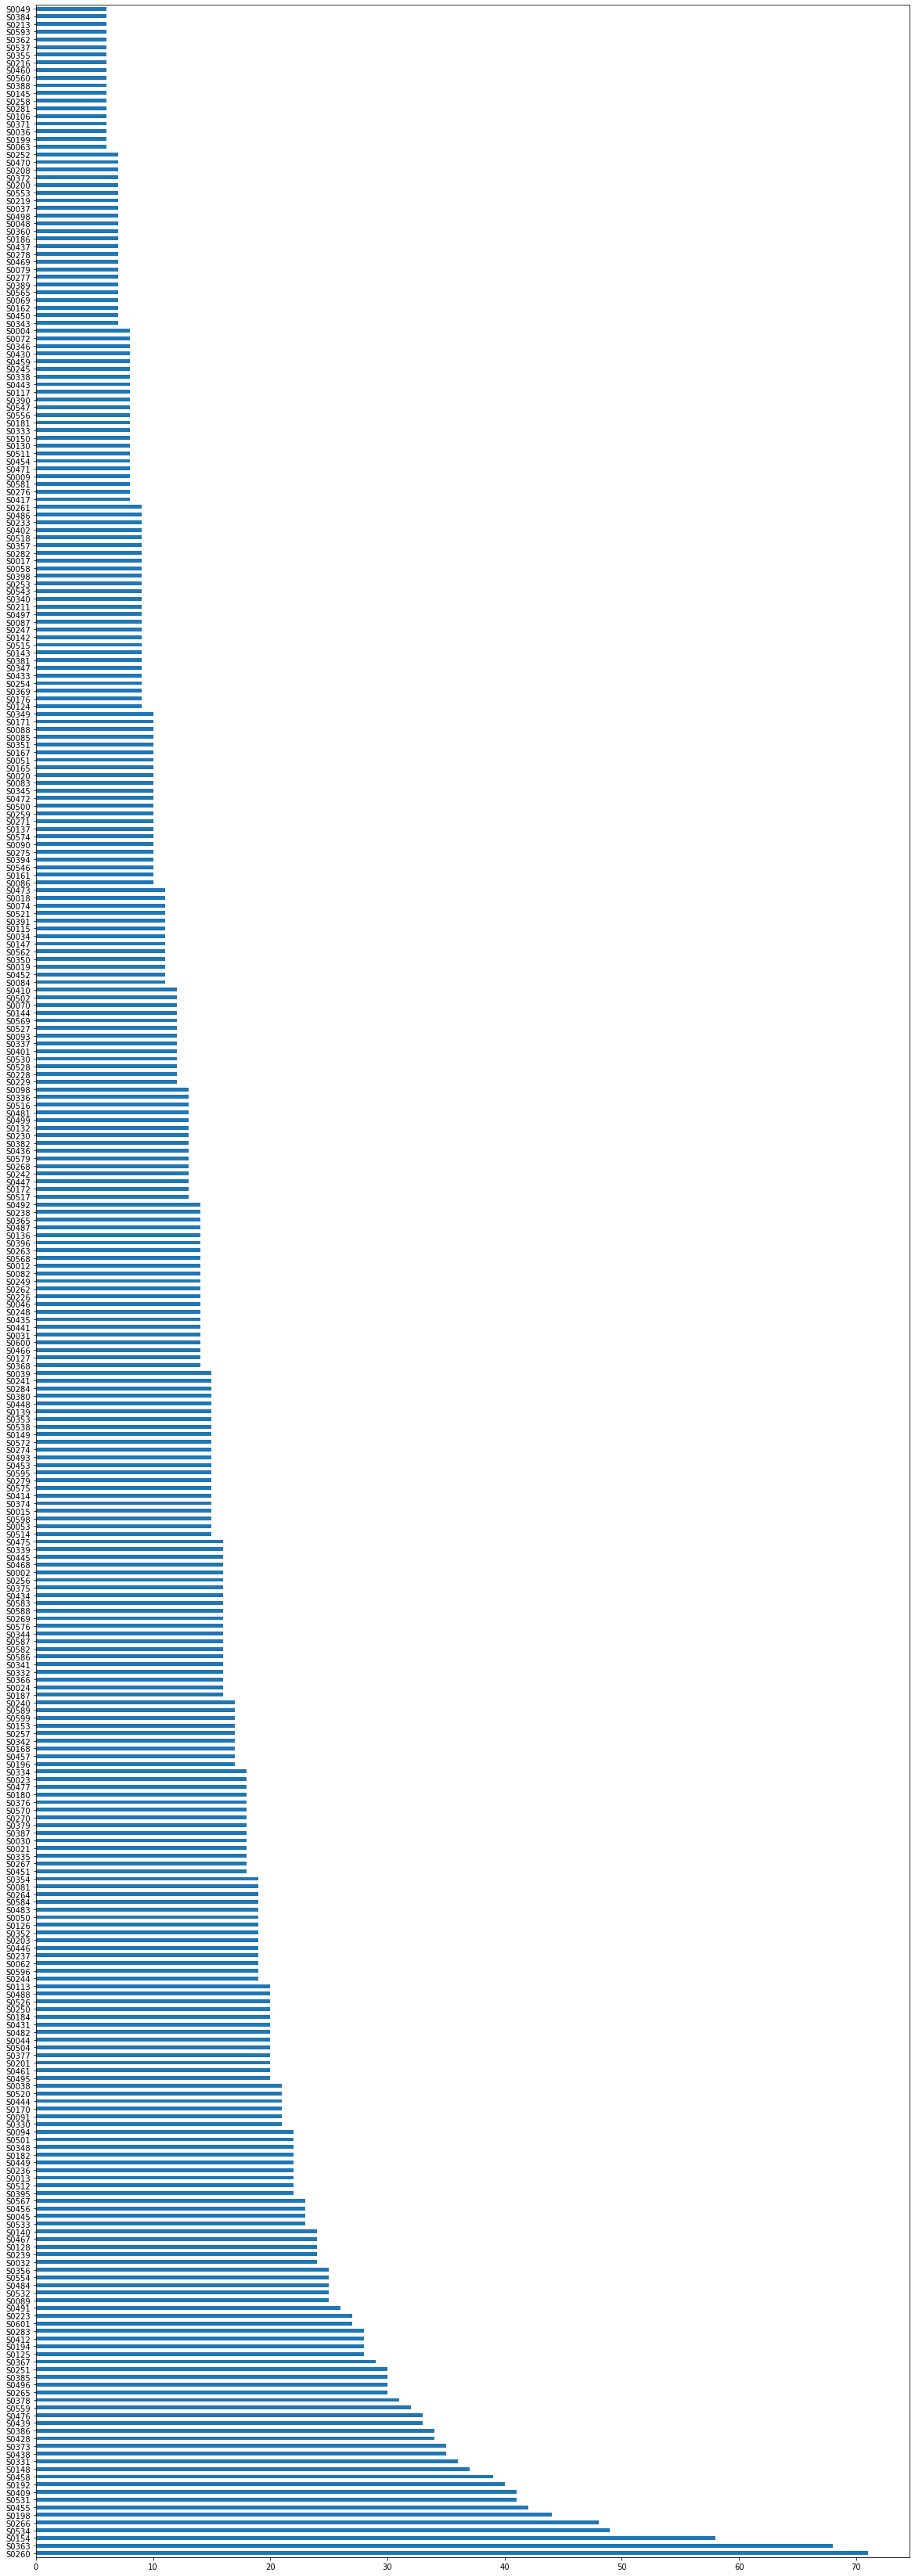

In [58]:
number_of_techniques_per_software = software_technique_table["source ID"].value_counts()
software_technique_table["source ID"].value_counts()[:333].plot(kind='barh', figsize=(20, 60))